In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import FukudaCsv


# アラームログが格納されているディレクトリを指定する
dir_path_to_process = ''

# CSVのロード
df = FukudaCsv.load(dir_path_to_process)

# カラーコードの指定（ヒートマップで使用）
CMAP = 'tab20c'

記録時刻:2021-10-12 07:38:00 〜 2021-10-14 17:06:00,  2 days 09:28:00 (57時間)


In [2]:
df.head()

,Unnamed:0,No.,時刻,床番号,コード,発生要因,値,継続時間,レベル,継続時間int,hour,dayhour,dayhour10min,alarm_level,alarm_type,start_datetime,diff_datetime,diff_sec,diff_min
0,44933,1798,2021-10-12 07:38:00,CH1001,0x201F,心電図ノイズ混入,---,4,N(TECH_),4,07,10月12日07時,12日07時30分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:00:00,0.0,0
1,44932,1799,2021-10-12 07:38:00,CH1001,0x201F,心電図ノイズ混入,---,5,N(TECH_),5,07,10月12日07時,12日07時30分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:00:00,0.0,0
2,44931,1800,2021-10-12 07:49:00,CH1001,0x201F,心電図ノイズ混入,---,3,N(TECH_),3,07,10月12日07時,12日07時40分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:11:00,660.0,11
3,4956,2983,2021-10-12 08:09:00,CH1002,0x1010,ＳｐＯ2下限,(計測値)89 < (下限閾値)90,25,H(MEAS_),25,08,10月12日08時,12日08時00分台,H,(MEAS_),2021-10-12 07:38:00,0 days 00:31:00,1860.0,31
4,44906,1825,2021-10-12 08:11:00,CH1001,0x201F,心電図ノイズ混入,---,8,N(TECH_),8,08,10月12日08時,12日08時10分台,N,(TECH_),2021-10-12 07:38:00,0 days 00:33:00,1980.0,33


In [3]:
# 集計対象のアラームを指定する
alarm_code = "0x1010"
alarm_name = FukudaCsv.ALARM_CODE[alarm_code]

ch = "CH1009"

In [4]:
# 指定されたアラームのみのDataFrameを作成
df = df.query(f"コード == '{alarm_code}' and 床番号 == '{ch}'")

Text(0.5, 1.0, 'CH1009のSpO2下限アラーム鳴動時の\n計測値と設定値の差')

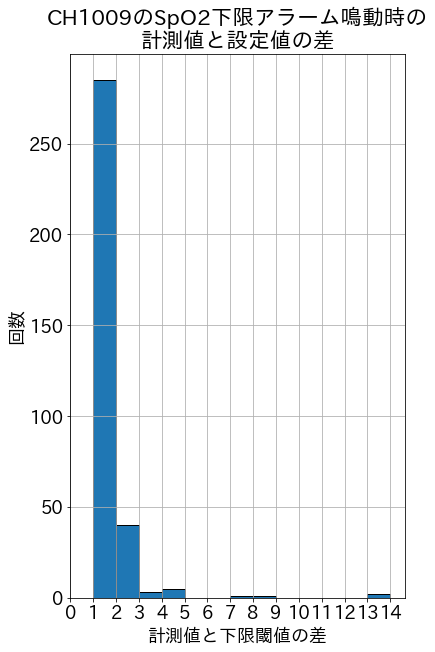

In [5]:
def get_measured_value(df):
    str = df['値']
    str = str[:7].replace('(計測値)', '')
    return str.strip()

def get_threshold_value(df):
    str = df['値']
    str = str[-2:]
    return str.strip()

def calc_diff(df):
    return df['下限閾値'] - df['計測値']
    
df['計測値'] = df.apply(get_measured_value, axis = 1)
df = df.astype({'計測値': 'int32'})

df['下限閾値'] = df.apply(get_threshold_value, axis = 1)
df = df.astype({'下限閾値': 'int32'})

df = df[df['計測値'] > 0]

df['計測値と下限閾値の差'] = df.apply(calc_diff, axis=1)
bins_count = math.floor(df['計測値と下限閾値の差'].max() - 1)
df['計測値と下限閾値の差'].hist(bins=bins_count, figsize=(6, 10), ec='black')
plt.xlabel('計測値と下限閾値の差')
plt.ylabel('回数')
plt.xticks(np.arange(0, 15, step=1))
plt.title(f"{ch}の{alarm_name}アラーム鳴動時の\n計測値と設定値の差")

In [6]:
#df['計測値'].unique()
df['下限閾値'].unique()

array([92, 80], dtype=int32)

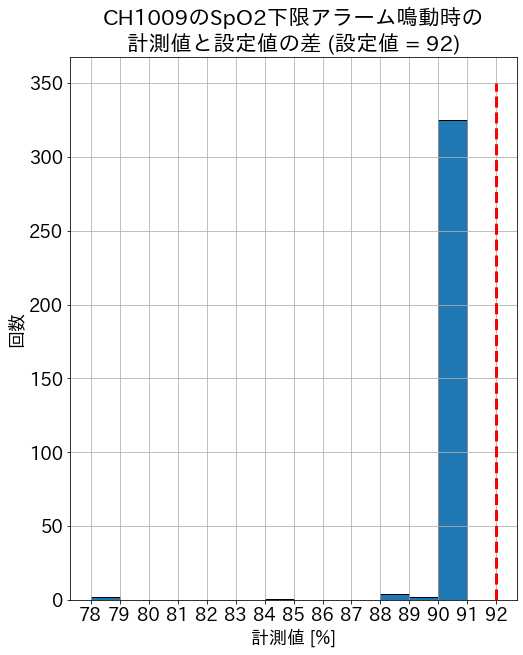

In [12]:
bins_count = math.floor(df['計測値と下限閾値の差'].max() - 1)
thres = 92
df.query(f"下限閾値 == {thres}")['計測値'].hist(bins=bins_count, figsize=(8, 10), ec='black')
plt.xlabel('計測値 [%]')
plt.ylabel('回数')
plt.xticks(np.arange(75, 100, step=1))
plt.title(f"{ch}の{alarm_name}アラーム鳴動時の\n計測値と設定値の差 (設定値 = {thres})")
plt.vlines(thres, 0, 350, linewidth=3, colors='red', linestyle='dashed')

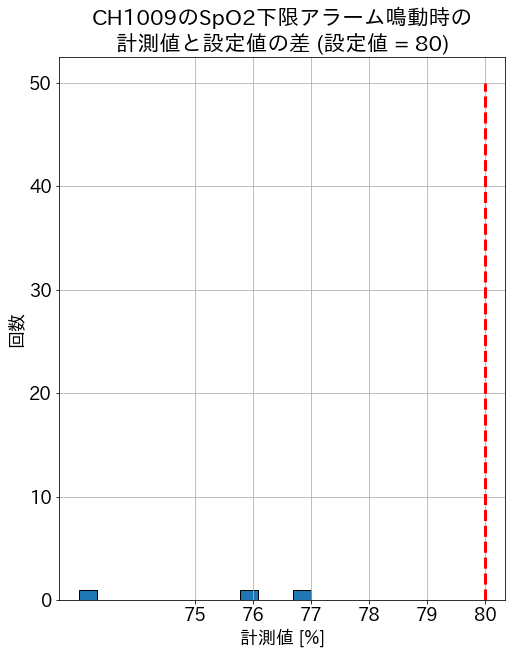

In [8]:
bins_count = math.floor(df['計測値と下限閾値の差'].max() - 1)
thres = 80
df.query(f"下限閾値 == {thres}")['計測値'].hist(bins=bins_count, figsize=(8, 10), ec='black')
plt.xlabel('計測値 [%]')
plt.ylabel('回数')
plt.xticks(np.arange(75, 100, step=1))
plt.title(f"{ch}の{alarm_name}アラーム鳴動時の\n計測値と設定値の差 (設定値 = {thres})")
plt.vlines(thres, 0, 50, linewidth=3, colors='red', linestyle='dashed')

([<matplotlib.axis.XTick at 0x1373f2250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

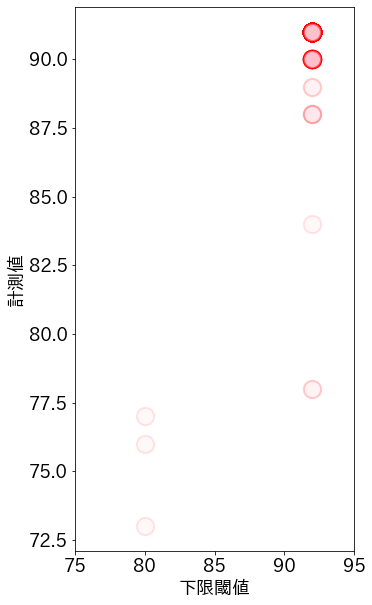

In [9]:
#df.plot.scatter(x='下限閾値', y='計測値と下限閾値の差',s=300, c="pink", alpha=0.05, linewidths=2,edgecolors="red", figsize=(5, 10))

df.plot.scatter(x='下限閾値', y='計測値',s=300, c="pink", alpha=0.1, linewidths=2,edgecolors="red", figsize=(5, 10))
plt.xticks(np.arange(75, 100, step=5))

<AxesSubplot:xlabel='継続時間int', ylabel='計測値と下限閾値の差'>

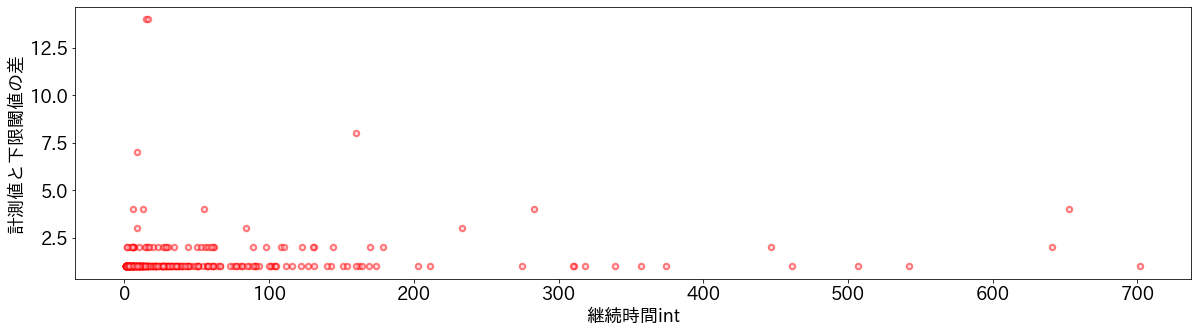

In [10]:
df.plot.scatter(x='継続時間int', y='計測値と下限閾値の差',s=30, c="pink", alpha=0.5, linewidths=2,edgecolors="red", figsize=(20, 5))

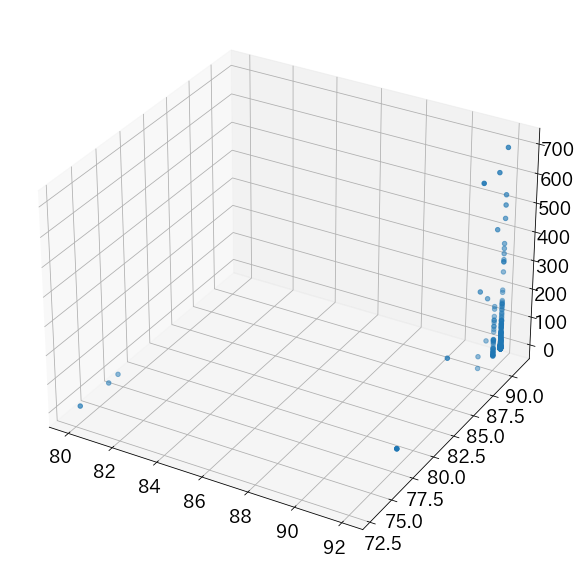

In [11]:
fig = plt.figure(figsize=(10,30))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['下限閾値'], df['計測値'], df['継続時間int'])
plt.show()